In [1]:
!git clone https://github.com/Dgotlieb/FruitsClassification.git

Cloning into 'FruitsClassification'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 3.88 MiB | 14.92 MiB/s, done.


In [2]:
%cd FruitsClassification

/content/FruitsClassification


Found 14 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3571 - loss: 0.7030 - val_accuracy: 0.4000 - val_loss: 3.5898
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5714 - loss: 2.4310 - val_accuracy: 0.6000 - val_loss: 1.2450
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4286 - loss: 1.7803 - val_accuracy: 0.6000 - val_loss: 0.6677
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4286 - loss: 0.9988 - val_accuracy: 0.4000 - val_loss: 0.6955
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step - accuracy: 0.5000 - loss: 0.6458 - val_accuracy: 0.4000 - val_loss: 0.7465
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step - accuracy: 0.5714 - loss: 0.6622 - val_accuracy: 0.4000 - val_loss: 0.6633
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step - accuracy: 0.5714 - loss: 0.6339 - val_accuracy: 0.4000 - val_loss: 0.5709
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step - accuracy: 0.6429 - loss: 0.5772 - val_accuracy: 1.0000 - val_loss: 0.5094
Epoc

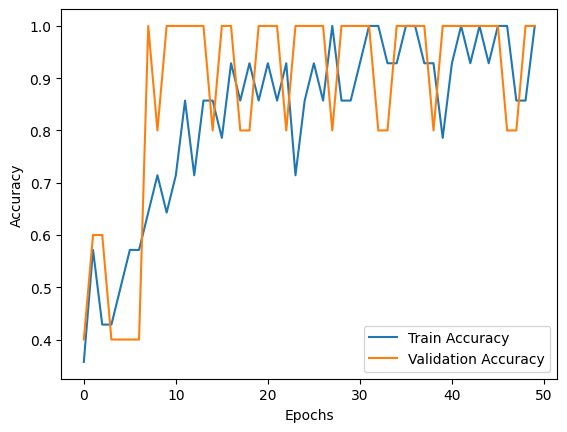

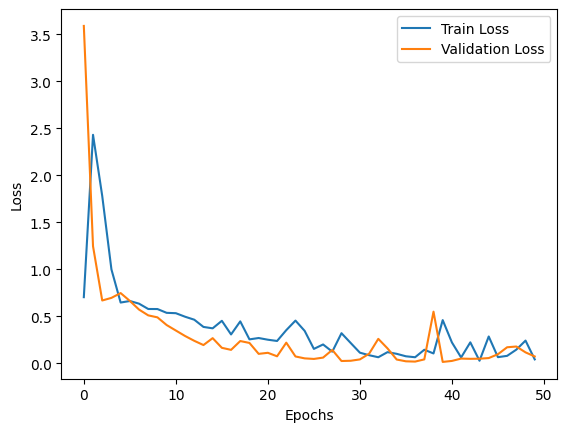

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Define paths
train_dir = "dataset/train"
val_dir = "dataset/validation"

# Image parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="binary",  # Use 'categorical' for more than 2 classes
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="binary",
)

# Define CNN Model
model = Sequential(
    [
        Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Using Input layer instead of input_shape in Conv2D
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation="relu"),
        Dropout(0.5),
        Dense(1, activation="sigmoid"),  # Use Dense(len(classes), activation="softmax") for more classes
    ]
)

# Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the Model
EPOCHS = 50

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
)

# Save Model
model.save("apple_banana_classifier.h5")

# Plot Training Results
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [5]:
import tensorflow as tf
import numpy as np
import cv2

# Load the trained model and compile it
model = tf.keras.models.load_model("apple_banana_classifier.h5", compile=False)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])  # Recompile

# Define class labels
class_labels = ["Apple", "Banana"]

# Load and preprocess the test image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (150, 150))  # Resize to match training size
    img = img.astype("float32") / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Test on a single image
# image_path = "dataset/validation/banana/banana10.jpeg"  # Change to your test image path
image_path = "dataset/validation/banana/banana10.jpeg"  # Change to your test image path
image = preprocess_image(image_path)
prediction = model.predict(image)

# Print the result (Predicted class)
predicted_class = class_labels[int(prediction[0][0] > 0.5)]  # Using prediction[0][0] to avoid the deprecated operation
confidence = prediction[0][0] * 100 if predicted_class == "Banana" else (1 - prediction[0][0]) * 100

# Get the model's predicted probabilities for both classes
predicted_probabilities = model.predict(image)[0]  # Get probabilities for both classes
apple_prob = 1 - predicted_probabilities  # Probability for "Apple"
banana_prob = predicted_probabilities  # Probability for "Banana"

# Get the weights of the final Dense layer (used for prediction)
final_layer_weights = model.layers[-1].get_weights()[0]  # Weights of the last Dense layer
biases = model.layers[-1].get_weights()[1]  # Biases of the last Dense layer

print(f"Predicted class: {predicted_class} with {confidence:.2f}% confidence")
print(f"Apple Probability: {apple_prob[0] * 100:.2f}%")
print(f"Banana Probability: {banana_prob[0] * 100:.2f}%")

# Displaying additional model weights information
print("\nModel weights for the final dense layer:")
print(f"Final Layer Weights (size): {final_layer_weights.shape}")
print(f"Final Layer Biases: {biases}")

# If you want to see the actual raw prediction score (logits), you can access them too:
raw_prediction_score = model.layers[-1].output
print(f"Raw prediction score (logits): {raw_prediction_score}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted class: Banana with 100.00% confidence
Apple Probability: 0.00%
Banana Probability: 100.00%

Model weights for the final dense layer:
Final Layer Weights (size): (512, 1)
Final Layer Biases: [-0.00201224]
Raw prediction score (logits): <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_120>
